<a href="https://colab.research.google.com/github/tphlabs/python_workshop/blob/main/gaussian_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Fit and Parameters Accuracy Estimation

v.0.1.0

This notebook demonstrates how to fit a Gaussian model to data and estimate the accuracy of the fitted parameters amplitude $A$, the mean of the Gaussian $\mu$  and standard deviation $\sigma$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

### Define Gaussian Function


In [ ]:
# Gaussian function definition
def gaussian(x, amp, mu, sigma):
    return amp * np.exp(-(x - mu)**2 / (2 * sigma**2))

### Generate Sample Data distributed randomly around Gaussian distribution
`np.random.normal(0, 0.2, x.size)` generates arbitrary numbers with average 0 and std 0.2

In [ ]:
# Generate sample data (for demonstration)
# np.random.seed(0) <- uncomment to have random set reproducable
x = np.linspace(-10, 10, 100)
noise = np.random.normal(0, 0.2, x.size)
A0, mu0, sigma0 = 3, 2, 1.5
y = gaussian(x, A0, mu0, sigma0) + noise

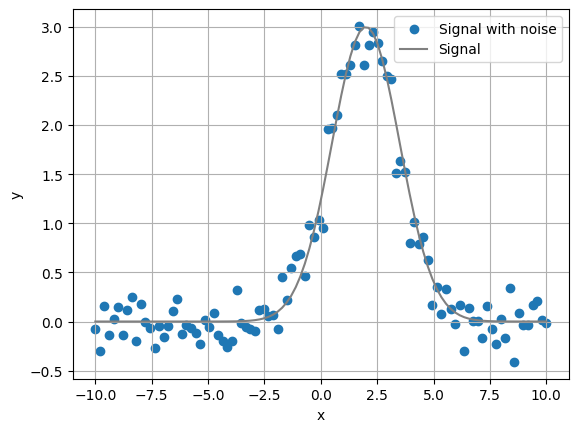

In [ ]:
plt.scatter(x, y, label='Signal with noise')
plt.plot(x, gaussian(x, A0, mu0, sigma0), color='gray', label='Signal')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Fit Gaussian Model to Data

`curve_fit` returns:
 - in variable `popt` (*opt* stays for optimal) $A$, $\mu$, $\sigma$.  
 - in variable `pcov` (*cov* stays for covariance) the *covariance* matrix

In [ ]:
# Initial parameter guess: amplitude, mean, standard deviation
a_guess = A0
mu_guess = mu0
sigma_guess = sigma0
initial_guess = [a_guess, mu_guess, sigma_guess]
print(f"Initial guess:\n A: {a_guess:.3f}\n \u03BC: {mu_guess:.3f} \n \u03c3: {sigma_guess:.3f}")

# Curve fitting
popt, pcov = curve_fit(gaussian, x, y, p0=initial_guess)

# Fitted parameters
A, mu, sigma = popt

print(f"Fitted parameters:\n A: {A:.3f}\n \u03BC: {mu:.3f} \n \u03c3: {sigma:.3f}")

Initial guess:
 A: 3.000
 μ: 2.000 
 σ: 1.500
Fitted parameters:
 A: 2.935
 μ: 1.919 
 σ: 1.512


### Plot Data and Fit

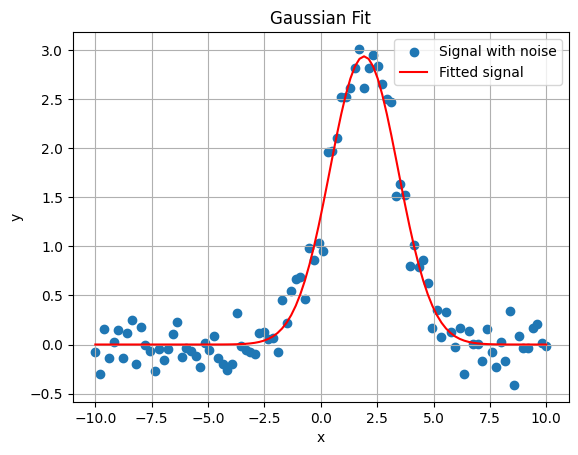

In [ ]:
# Plot data and fit
plt.scatter(x, y, label='Signal with noise')
plt.plot(x, gaussian(x, *popt), color='red', label='Fitted signal')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gaussian Fit')
plt.grid()
plt.show()

## We want to estimate the error of the parameters
### For this we generate [covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix) of parameters $A$, $\mu$, and $\sigma$

### Covariance Matrix for Gaussian fit
$$
\begin{bmatrix}
\Sigma_{A A} & \Sigma_{A \mu } & \Sigma_{A \sigma} \\
\Sigma_{\mu A} & \Sigma_{\mu \mu} & \Sigma_{\mu \sigma} \\
\Sigma_{\sigma A} & \Sigma_{\sigma \mu} & \Sigma_{\sigma \sigma}
\end{bmatrix}
$$
#### STD$(\mu)=\sqrt\Sigma_{\mu\mu}$, &nbsp;&nbsp;          STD$(\sigma)=\sqrt\Sigma_{\sigma\sigma}$

In [ ]:
print(f"Covariance Matrix:\n{pcov}")

Covariance Matrix:
[[ 3.63849633e-03  2.22085019e-11 -1.24983277e-03]
 [ 2.22085019e-11  1.28796227e-03 -1.29020324e-11]
 [-1.24983277e-03 -1.29020324e-11  1.28796227e-03]]


### Calculate Standard Errors

In [ ]:
# Standard errors of the parameters
A_err, mu_err, sigma_err = np.sqrt(np.diag(pcov))
print(f"Fitted parameters with uncertainties:")
print(f'A    : {A:.2f} ± {A_err:.2f}')
print(f'mu   : {mu:.2f} ± {mu_err:.2f}')
print(f'sigma: {sigma:.2f} ± {sigma_err:.2f}')

Fitted parameters with uncertainties:
A    : 2.93 ± 0.06
mu   : 1.92 ± 0.04
sigma: 1.51 ± 0.04
